## **Importing Libraries**

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager

from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.preprocessing import MinMaxScaler

# Tensorflow Quantum 
from cirq.contrib.svg import SVGCircuit
import tensorflow_quantum as tfq

import tensorflow as tf
import cirq
import sympy

2022-02-22 22:15:44.197074: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-22 22:15:44.197092: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-02-22 22:15:45.716702: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-02-22 22:15:45.716724: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (toto): /proc/driver/nvidia/version does not exist
2022-02-22 22:15:45.717252: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To en

## **Loading Our Dataset**

In [2]:
df = pd.read_csv('price/raw/AAPL.csv')

## **Feature Extraction**

In [3]:
del df["Date"]
df

,Open,High,Low,Close,Adj Close,Volume
0,95.108574,96.448570,94.928574,96.424286,87.121140,91973000
1,96.510002,96.621429,95.657143,95.747147,86.509338,84093800
2,96.167145,96.898575,95.828575,96.610001,87.288956,97799100
3,96.864288,97.497147,96.538574,97.205711,87.827171,82416600
4,97.207146,97.612854,94.585716,94.677139,85.542564,121999500
...,...,...,...,...,...,...
1253,160.139999,162.000000,159.929993,161.470001,161.470001,25966000
1254,160.100006,163.119995,160.000000,162.910004,162.910004,29516900
1255,163.800003,163.889999,162.610001,163.350006,163.350006,27269600
1256,163.639999,164.520004,163.479996,164.000000,164.000000,26785100


In [4]:
dfn = df.copy()

In [5]:
for i in df.columns:
    dfn[i] = MinMaxScaler().fit_transform(np.array(df[i]).reshape(-1,1))

In [6]:
print('----------------------')
print('Mean')
print('----------------------')
dfn.mean(axis=0)

----------------------
Mean
----------------------


Open         0.424483
High         0.423040
Low          0.422843
Close        0.425352
Adj Close    0.412452
Volume       0.148176
dtype: float64

In [7]:
print('-------------------------')
print('Var')
print('-------------------------')
dfn.var(axis=0)

-------------------------
Var
-------------------------


Open         0.055367
High         0.057438
Low          0.055653
Close        0.056649
Adj Close    0.056897
Volume       0.015468
dtype: float64

In [8]:
# PCA train
# ==============================================================================
pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(dfn)

# Pipeline Model
modelo_pca = pca_pipe.named_steps['pca']

In [9]:
# from arrray to dataframe
pd.DataFrame(
    data    = modelo_pca.components_,
    columns = dfn.columns,
    index   = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6']
)

,Open,High,Low,Close,Adj Close,Volume
PC1,0.427746,0.427566,0.428410,0.428067,0.428596,-0.289394
PC2,0.139702,0.147801,0.123497,0.133866,0.101894,0.956600
PC3,-0.431686,-0.201900,-0.214419,0.014315,0.851969,0.029168
PC4,0.620523,0.015251,-0.207841,-0.703235,0.277443,0.002713
PC5,-0.085765,0.700636,-0.695164,0.123659,-0.053851,-0.017551
PC6,-0.467717,0.513279,0.478316,-0.537403,0.014025,0.000960


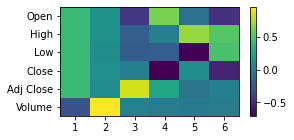

In [10]:
# Heatmap components
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 2))
componentes = modelo_pca.components_
plt.imshow(componentes.T, cmap='viridis', aspect='auto')
plt.yticks(range(len(dfn.columns)), dfn.columns)
plt.xticks(range(len(dfn.columns)), np.arange(modelo_pca.n_components_) + 1)
plt.grid(False)
plt.colorbar();

----------------------------------------------------
Porcentaje de varianza explicada por cada componente
----------------------------------------------------
[8.99320258e-01 9.98259321e-02 5.75392234e-04 1.55635837e-04
 1.01704339e-04 2.10769913e-05]


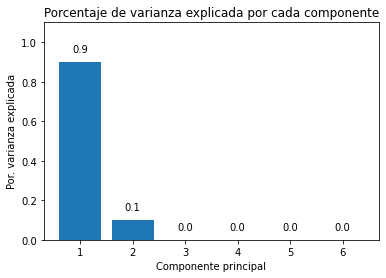

In [11]:
# Variance porcentage for each variable
# ==============================================================================
print('----------------------------------------------------')
print('Porcentaje de varianza explicada por cada componente')
print('----------------------------------------------------')
print(modelo_pca.explained_variance_ratio_)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.bar(
    x      = np.arange(modelo_pca.n_components_) + 1,
    height = modelo_pca.explained_variance_ratio_
)

for x, y in zip(np.arange(len(dfn.columns)) + 1, modelo_pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada');

In [12]:
df

,Open,High,Low,Close,Adj Close,Volume
0,95.108574,96.448570,94.928574,96.424286,87.121140,91973000
1,96.510002,96.621429,95.657143,95.747147,86.509338,84093800
2,96.167145,96.898575,95.828575,96.610001,87.288956,97799100
3,96.864288,97.497147,96.538574,97.205711,87.827171,82416600
4,97.207146,97.612854,94.585716,94.677139,85.542564,121999500
...,...,...,...,...,...,...
1253,160.139999,162.000000,159.929993,161.470001,161.470001,25966000
1254,160.100006,163.119995,160.000000,162.910004,162.910004,29516900
1255,163.800003,163.889999,162.610001,163.350006,163.350006,27269600
1256,163.639999,164.520004,163.479996,164.000000,164.000000,26785100


In [13]:
df = df['Close'].values
df1 = df.reshape(-1, 1)

After extracting one column:


In [14]:
df1.shape

(1258, 1)

In [15]:
df1[0]

array([96.424286])

In [16]:
dataset_train = np.array(df1[:int(df1.shape[0]*0.7)])
dataset_test = np.array(df1[int(df1.shape[0]*0.7):])
print(dataset_train.shape)
print(dataset_test.shape)

(880, 1)
(378, 1)


In [17]:
df_pca = dfn['Open'].values
df_pca = df_pca.reshape(-1, 1)

In [18]:
dataset_train_n = np.array(df_pca[:int(df_pca.shape[0]*0.7)])
dataset_test_n = np.array(df_pca[int(df_pca.shape[0]*0.7):])
print(dataset_train_n.shape)
print(dataset_test_n.shape)

(880, 1)
(378, 1)


In [19]:
dataset_train_n

array([[0.3628254 ],
       [0.37563837],
       [0.3725037 ],
       [0.37887753],
       [0.38201222],
       [0.36197642],
       [0.364249  ],
       [0.37798936],
       [0.39443331],
       [0.40669774],
       [0.40738998],
       [0.40788628],
       [0.40644955],
       [0.41069443],
       [0.39038437],
       [0.39221297],
       [0.3667176 ],
       [0.36090542],
       [0.37979181],
       [0.36987836],
       [0.35766625],
       [0.3616499 ],
       [0.36999597],
       [0.36209396],
       [0.33816596],
       [0.32741666],
       [0.32884027],
       [0.33766959],
       [0.31554403],
       [0.31918812],
       [0.32313257],
       [0.34076514],
       [0.3286444 ],
       [0.31749018],
       [0.29315726],
       [0.31742488],
       [0.30493843],
       [0.30305758],
       [0.28925201],
       [0.27024802],
       [0.27461043],
       [0.27156721],
       [0.25541058],
       [0.26417461],
       [0.24276738],
       [0.22551358],
       [0.19911707],
       [0.217

In [20]:
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout


Scaling data:

In [21]:
scaler = MinMaxScaler(feature_range=(0,1))
dataset_train = scaler.fit_transform(dataset_train)
dataset_train[:5]

array([[0.52628268],
       [0.51751258],
       [0.528688  ],
       [0.53640345],
       [0.50365417]])

In [22]:
dataset_test = scaler.transform(dataset_test)
dataset_test[:5]

array([[0.59681392],
       [0.58593445],
       [0.58710015],
       [0.58774767],
       [0.60186506]])

In [23]:
def create_dataset(df):
    x = []
    y = []
    for i in range(30, df.shape[0]):
        x.append(df[i-30:i,0])
        y.append(df[i,0])
    x = np.array(x)
    y = np.array(y)
    return x,y 

Creating training and testing datasets:

In [24]:
x_train, y_train = create_dataset(dataset_train)
x_test, y_test = create_dataset(dataset_test)

In [25]:
x_train[0],y_train[0]

(array([0.52628268, 0.51751258, 0.528688  , 0.53640345, 0.50365417,
        0.49967624, 0.51669845, 0.54110313, 0.55646014, 0.57218721,
        0.57612819, 0.57647976, 0.57018889, 0.57276072, 0.55555352,
        0.52363684, 0.50816877, 0.53803171, 0.51172131, 0.49745589,
        0.50100835, 0.51976978, 0.51116618, 0.48487426, 0.45819382,
        0.45390125, 0.46326344, 0.43956182, 0.44254075, 0.45188446]),
 0.47969356922281525)

In [26]:
x_train.shape,x_test.shape

((850, 30), (348, 30))

Creating our LSTM model:

In [27]:
model = Sequential()
model.add(LSTM(units=100, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=15))
model.add(Dense(units=1))

#model.add(tf.keras.layers.Reshape((1, 1)))
#model.add(Dropout(0.2))
#cluster_state_dual = tfq.layers.AddCircuit()(
#    excitation_input_dual, prepend=cluster_state_circuit(cluster_state_bits))

#quantum_model_dual =tfq.layers.PQC(model_circuit, model_readout)
#d1_dual = tf.keras.layers.Dense(1)(tfq.convert_to_tensor([quantum_model_dual]))

#d2_dual = tf.keras.layers.Dense(1)(d1_dual)
#circuit_tensor = tfq.convert_to_tensor([quantum_model_dual])
#model.add(circuit_tensor)

#hybrid_model = tf.keras.Model(inputs=[excitation_input_dual], outputs=[d2_dual])
#model.add(quantum_model_dual)

#model.add(Dense(units=10))
#d1_dual = tf.keras.layers.Dense(1)(quantum_model_dual)
#model.add(Dropout(0.2))
#model.add(Dense(units=10))


Reshape features for the LSTM layer:

In [28]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [29]:
model.compile(loss='mean_squared_error', optimizer='adam')

Start the training:

In [30]:
model.fit(x_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
27/27 [==============================] - 5s 42ms/step - loss: 0.0441
Epoch 2/100
27/27 [==============================] - 1s 36ms/step - loss: 0.0064
Epoch 3/100
27/27 [==============================] - 1s 45ms/step - loss: 0.0046
Epoch 4/100
27/27 [==============================] - 1s 37ms/step - loss: 0.0042
Epoch 5/100
27/27 [==============================] - 1s 37ms/step - loss: 0.0039
Epoch 6/100
27/27 [==============================] - 1s 38ms/step - loss: 0.0041
Epoch 7/100
27/27 [==============================] - 1s 42ms/step - loss: 0.0038
Epoch 8/100
27/27 [==============================] - 1s 37ms/step - loss: 0.0039
Epoch 9/100
27/27 [==============================] - 1s 40ms/step - loss: 0.0038
Epoch 10/100
27/27 [==============================] - 1s 39ms/step - loss: 0.0034
Epoch 11/100
27/27 [==============================] - 1s 39ms/step - loss: 0.0031
Epoch 12/100
27/27 [==============================] - 1s 39ms/step - loss: 0.0029
Epoch 13/100
27/27 [=====

27/27 [==============================] - 1s 36ms/step - loss: 8.6000e-04


## **Results visualization**

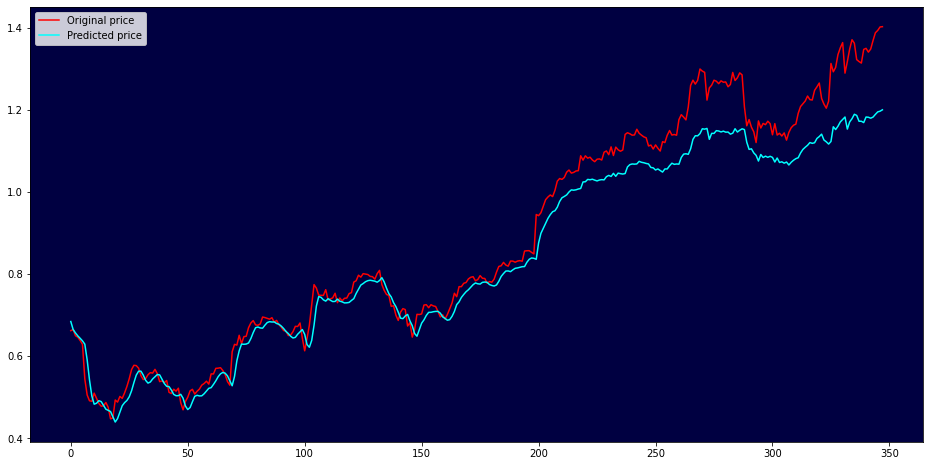

In [31]:
predictions_test = model.predict(x_test)
#predictions = scaler.inverse_transform(predictions)
#y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

fig, ax = plt.subplots(figsize=(16,8))
ax.set_facecolor('#000041')
ax.plot(y_test, color='red', label='Original price')
plt.plot(predictions_test, color='cyan', label='Predicted price')
plt.legend()

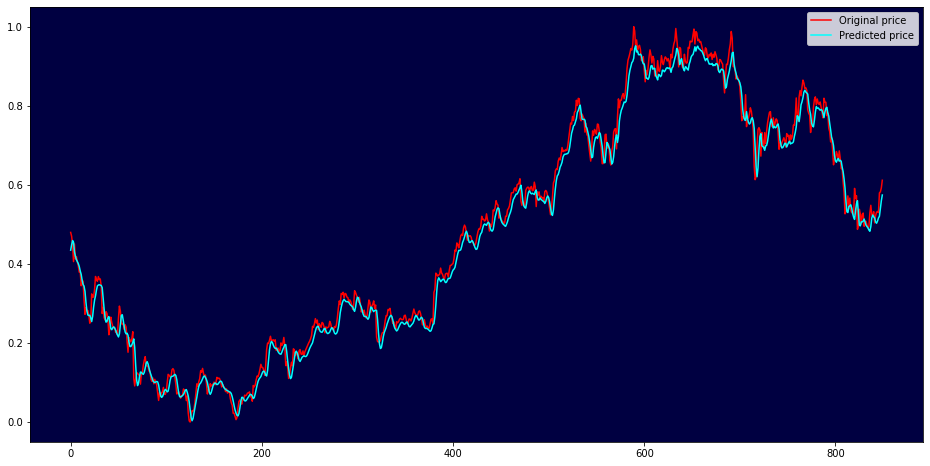

In [32]:
predictions_train = model.predict(x_train)
#predictions = scaler.inverse_transform(predictions)
#y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

fig, ax = plt.subplots(figsize=(16,8))
ax.set_facecolor('#000041')
ax.plot(y_train, color='red', label='Original price')
plt.plot(predictions_train, color='cyan', label='Predicted price')
plt.legend()

# Convert classical data to Quantum circuit

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


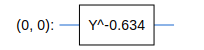

In [33]:
def convert_to_circuit(image):
    """Encode truncated classical image into quantum datapoint."""
    #values = np.ndarray.flatten(image)
    qubits = cirq.GridQubit.rect(1, 1)
    circuit = cirq.Circuit()
   # print(qubits)
    #for i, value in enumerate(image):
    circuit.append(cirq.Y(qubits[0])**(np.pi*image[0]))
    return circuit
x_train_circ = [convert_to_circuit(x) for x in predictions_train]
x_test_circ = [convert_to_circuit(x) for x in predictions_test]
x_train_tfcirc_1 = tfq.convert_to_tensor(x_train_circ)
x_test_tfcirc_1 = tfq.convert_to_tensor(x_test_circ)
SVGCircuit(x_train_circ[0])

# Design the ansatz

In [34]:
class CircuitLayerBuilder():
    def __init__(self, data_qubits, readout):
        self.data_qubits = data_qubits
        self.readout = readout

    def add_layer(self, circuit, gate, prefix):
        
        for i, qubit in enumerate(self.data_qubits):
            symbol = sympy.Symbol(prefix + '-' + str(i))
            #circuit.append(gate(qubit, self.readout)**symbol)
            circuit.append(gate(self.readout)**symbol)


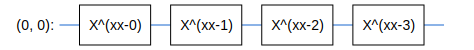

In [35]:
demo_builder = CircuitLayerBuilder(data_qubits = cirq.GridQubit.rect(1,4),
                                   readout=cirq.GridQubit(0,0))

circuit = cirq.Circuit()
demo_builder.add_layer(circuit, gate = cirq.X, prefix='xx')
SVGCircuit(circuit)


# Build the quantum circuit

In [36]:
def create_quantum_model():
    """Create a QNN model circuit and readout operation to go along with it."""
    data_qubits = cirq.GridQubit.rect(1, 1)  # a 1x1 grid.
    readout = cirq.GridQubit(0, 0)         # a single qubit at [-1,-1]
    circuit = cirq.Circuit()

    # Prepare the readout qubit.
    #circuit.append(cirq.X(readout))
    #circuit.append(cirq.H(readout))

    builder = CircuitLayerBuilder(
        data_qubits = data_qubits,
        readout=readout)

    # Then add layers (experiment by adding more).
    builder.add_layer(circuit, cirq.Y, "xx1")
    #builder.add_layer(circuit, cirq.Z, "zz1")
    #builder.add_layer(circuit, cirq.X, "xx2")
    # Finally, prepare the readout qubit.
    #circuit.append(cirq.H(readout))

    return circuit, cirq.Z(readout)


In [37]:
model_circuit, model_readout = create_quantum_model()


## use the result of the classical to train the quantum circuit

In [38]:
# Build the Keras model.
model = tf.keras.Sequential([
    # The input is the data-circuit, encoded as a tf.string
    tf.keras.layers.Input(shape=(), dtype=tf.string),
    # The PQC layer returns the expected value of the readout gate, range [-1,1].
    tfq.layers.PQC(model_circuit, model_readout),
    tf.keras.layers.Reshape((1,1)),

    #tf.keras.layers.Dense(units=10, activation='relu'),
    #tf.keras.layers.LSTM(units=1, return_sequences=True),
    tf.keras.layers.Dense(units=1, activation='relu'),

])


In [39]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [40]:
print(model.summary())


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 pqc (PQC)                   (None, 1)                 1         
                                                                 
 reshape (Reshape)           (None, 1, 1)              0         
                                                                 
 dense_1 (Dense)             (None, 1, 1)              2         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________
None


In [43]:
model.fit(x_train_tfcirc_1, y_train, epochs=50, batch_size=32)

Epoch 1/50
27/27 [==============================] - 0s 4ms/step - loss: 0.0859
Epoch 2/50
27/27 [==============================] - 0s 5ms/step - loss: 0.0854
Epoch 3/50
27/27 [==============================] - 0s 4ms/step - loss: 0.0850
Epoch 4/50
27/27 [==============================] - 0s 4ms/step - loss: 0.0849
Epoch 5/50
27/27 [==============================] - 0s 4ms/step - loss: 0.0848
Epoch 6/50
27/27 [==============================] - 0s 4ms/step - loss: 0.0848
Epoch 7/50
27/27 [==============================] - 0s 4ms/step - loss: 0.0847
Epoch 8/50
27/27 [==============================] - 0s 4ms/step - loss: 0.0847
Epoch 9/50
27/27 [==============================] - 0s 4ms/step - loss: 0.0846
Epoch 10/50
27/27 [==============================] - 0s 5ms/step - loss: 0.0847
Epoch 11/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0847
Epoch 12/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0846
Epoch 13/50
27/27 [==============================

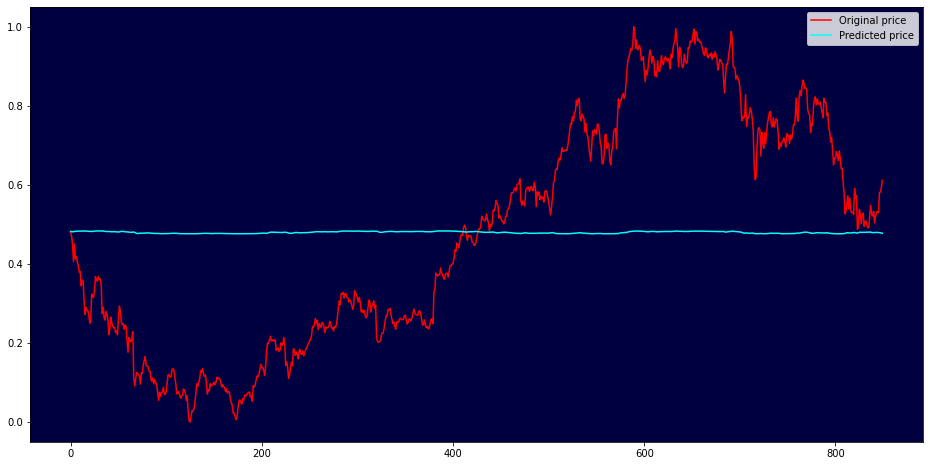

In [47]:
predictions_train = model.predict(x_train_tfcirc_1)
predictions_train = predictions_train.reshape(850,1)
#predictions = scaler.inverse_transform(predictions)
#y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

fig, ax = plt.subplots(figsize=(16,8))
ax.set_facecolor('#000041')
ax.plot(y_train, color='red', label='Original price')
plt.plot(predictions_train, color='cyan', label='Predicted price')
plt.legend()